## 이미지 증대하기

#### 먼저 새로운 CSV파일을 만들어 볼것

In [1]:
import pandas as pd
import numpy as np
from PIL import Image
import imgaug as ia
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/train_df.csv',index_col = 0)
df

,file_name,class,state,label
index,,,,
0,10000.png,transistor,good,transistor-good
1,10001.png,capsule,good,capsule-good
2,10002.png,transistor,good,transistor-good
3,10003.png,wood,good,wood-good
4,10004.png,bottle,good,bottle-good
...,...,...,...,...
4272,14272.png,transistor,good,transistor-good
4273,14273.png,transistor,good,transistor-good
4274,14274.png,grid,good,grid-good


In [3]:
# good인 상태인 이미지 삭제
df2 = df[df['state']!='good']
df2

,file_name,class,state,label
index,,,,
8,10008.png,cable,bent_wire,cable-bent_wire
10,10010.png,carpet,hole,carpet-hole
13,10013.png,pill,pill_type,pill-pill_type
16,10016.png,metal_nut,scratch,metal_nut-scratch
19,10019.png,screw,thread_side,screw-thread_side
...,...,...,...,...
4245,14245.png,leather,cut,leather-cut
4248,14248.png,transistor,bent_lead,transistor-bent_lead
4251,14251.png,cable,combined,cable-combined


In [4]:
df2.describe()

,file_name,class,state,label
count,648,648,648,648
unique,648,15,48,73
top,10008.png,pill,color,toothbrush-defective
freq,1,73,48,15


In [5]:
df2.loc[:,['file_name','label']]

,file_name,label
index,,
8,10008.png,cable-bent_wire
10,10010.png,carpet-hole
13,10013.png,pill-pill_type
16,10016.png,metal_nut-scratch
19,10019.png,screw-thread_side
...,...,...
4245,14245.png,leather-cut
4248,14248.png,transistor-bent_lead
4251,14251.png,cable-combined


In [6]:
img_list = df2.loc[:,['file_name','label']].values.tolist()
img_list

[['10008.png', 'cable-bent_wire'],
 ['10010.png', 'carpet-hole'],
 ['10013.png', 'pill-pill_type'],
 ['10016.png', 'metal_nut-scratch'],
 ['10019.png', 'screw-thread_side'],
 ['10020.png', 'zipper-fabric_border'],
 ['10023.png', 'pill-scratch'],
 ['10033.png', 'hazelnut-crack'],
 ['10035.png', 'screw-manipulated_front'],
 ['10053.png', 'bottle-contamination'],
 ['10073.png', 'zipper-split_teeth'],
 ['10082.png', 'pill-crack'],
 ['10088.png', 'wood-combined'],
 ['10089.png', 'hazelnut-crack'],
 ['10092.png', 'pill-color'],
 ['10095.png', 'screw-thread_top'],
 ['10096.png', 'cable-missing_cable'],
 ['10104.png', 'pill-color'],
 ['10110.png', 'capsule-squeeze'],
 ['10111.png', 'capsule-squeeze'],
 ['10112.png', 'zipper-rough'],
 ['10113.png', 'capsule-crack'],
 ['10114.png', 'screw-thread_side'],
 ['10118.png', 'capsule-poke'],
 ['10132.png', 'metal_nut-flip'],
 ['10133.png', 'carpet-metal_contamination'],
 ['10142.png', 'metal_nut-color'],
 ['10144.png', 'transistor-bent_lead'],
 ['10153

In [50]:
for i,info in enumerate(img_list):
#     print(i,info)
    image1 = Image.open('data/train/'+str(info[0]))
    print(image1.size)

(1024, 1024)
(1024, 1024)
(800, 800)
(700, 700)
(1024, 1024)
(1024, 1024)
(800, 800)
(1024, 1024)
(1024, 1024)
(900, 900)
(1024, 1024)
(800, 800)
(1024, 1024)
(1024, 1024)
(800, 800)
(1024, 1024)
(1024, 1024)
(800, 800)
(1000, 1000)
(1000, 1000)
(1024, 1024)
(1000, 1000)
(1024, 1024)
(1000, 1000)
(700, 700)
(1024, 1024)
(700, 700)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1000, 1000)
(840, 840)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(900, 900)
(900, 900)
(700, 700)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(800, 800)
(900, 900)
(1024, 1024)
(900, 900)
(700, 700)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(800, 800)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1000, 1000)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(800, 800)
(1024, 1024)
(1024, 1024)
(1000, 1000)
(1024, 1024)
(840, 840)
(1024, 1024)
(1000, 1000)
(1024, 1024)
(1024, 1024)
(840, 840)
(1024, 1024)
(1024, 1024)
(800, 800)
(1024, 1024)
(102

In [77]:
image1 = Image.open('data/train/'+str(img_list[0][0]))
image1 = np.array(image1)
image1.shape

(1024, 1024, 3)

In [84]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.5,
        iaa.GaussianBlur(sigma=(0, 0.5))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.75, 1.5)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
        translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate=(-25, 25),
        shear=(-8, 8)
    )
], random_order=True) # apply augmenters in random order

images_aug = seq(image=image1)

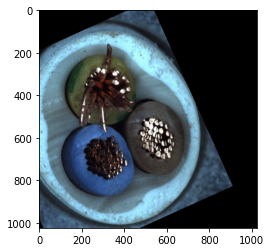

In [85]:
plt.imshow(images_aug)